In [3]:
import cv2
import numpy as np
from scipy.io import loadmat
import sys
data = loadmat('Brain.mat')
T1 = data['T1']
labels = data['label']
print(T1.shape)
print(labels.shape)

(362, 434, 10)
(362, 434, 10)


In [23]:
import matplotlib.pyplot as plt

for slice_index in range(T1.shape[2]):
    # 绘制T1图像和对应的label
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    t1_image = axes[0].imshow(T1[:, :, slice_index], cmap='gray')
    axes[0].set_title('T1 Image:' + str(slice_index + 1))
    fig.colorbar(t1_image, ax=axes[0], orientation='horizontal')
    label_image = axes[1].imshow(labels[:, :, slice_index], cmap='gray')
    axes[1].set_title('Label')
    fig.colorbar(label_image, ax=axes[1], orientation='horizontal')
    # 隐藏坐标轴
    for ax in axes:
        ax.axis('off')

plt.show()

In [5]:
from skimage.filters import threshold_multiotsu

# 选择一个代表性的切片进行分割
image_slice = T1[:, :, 0]

# 使用multi-otsu计算多个阈值以分割图像为6个区域
thresholds = threshold_multiotsu(image_slice, classes=6)

# 初始化最终分割图像为全零矩阵
final_segmented = np.zeros_like(image_slice)




In [10]:
# 通过阈值生成分割结果
# regions = np.digitize(image_slice, bins=thresholds, right=True)
# 应用每个阈值进行分割，并将结果合并到final_segmented图像中
for i, threshold in enumerate(np.sort(thresholds)):
    # 最后一个阈值以上的所有像素分配给最后一个区域
    if i == len(thresholds) - 1:
        final_segmented[image_slice > threshold] = i + 1
    else:
        final_segmented[(image_slice > threshold) & (image_slice <= thresholds[i + 1])] = i + 1

0
1
2
3
4


In [44]:
# 首先确定每个区域的平均像素强度
region_intensities = [np.mean(image_slice[final_segmented == i]) for i in range(0, 6)]
# 根据平均强度排序区域
sorted_regions = np.argsort(region_intensities)
# 分配区域
# 创建一个新的分割结果，其中标签值与实际需要的标签对应
adjusted_segmented = np.zeros_like(final_segmented)

# 通过映射将分割结果调整为接近实际标签的分配
for i, region_label in enumerate(sorted_regions, start=1):
    adjusted_segmented[final_segmented == (region_label + 1)] = i
    print(region_label)
    print(i)

adjusted_segmented[final_segmented == 3] = 4

# adjusted_segmented[(final_segmented != 3) & (final_segmented != 4)] = 0

adjusted_segmented[final_segmented == 4] = 5
adjusted_segmented[final_segmented == 1] = 3

adjusted_segmented[final_segmented == 5] = 2
adjusted_segmented[final_segmented == 2] = 1
adjusted_segmented[final_segmented == 0] = 0
label = labels[:,:,0]
adjusted_segmented = adjusted_segmented.astype(label.dtype)

0
1
1
2
2
3
3
4
4
5
5
6


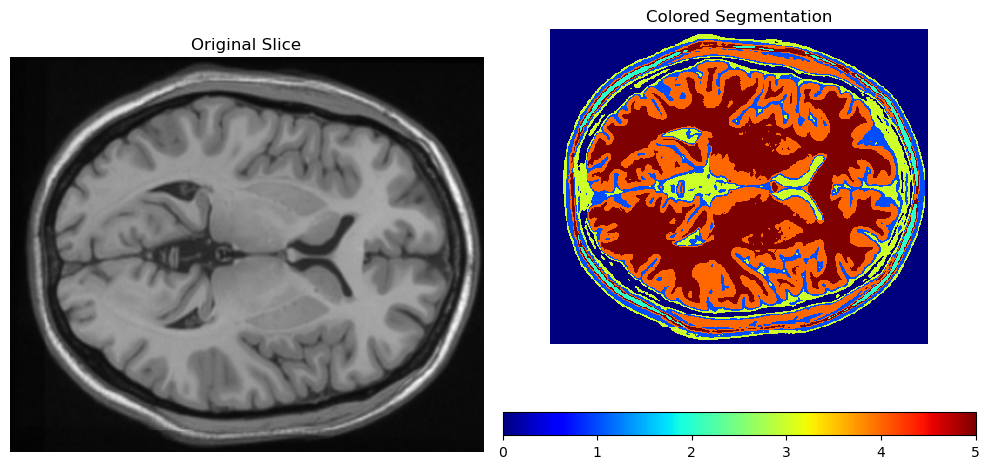

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_slice, cmap='gray')
axes[0].set_title('Original Slice')
t1_image = axes[1].imshow(adjusted_segmented, cmap='jet', interpolation='nearest')
axes[1].set_title('Colored Segmentation')
fig.colorbar(t1_image, ax=axes[1], orientation='horizontal')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

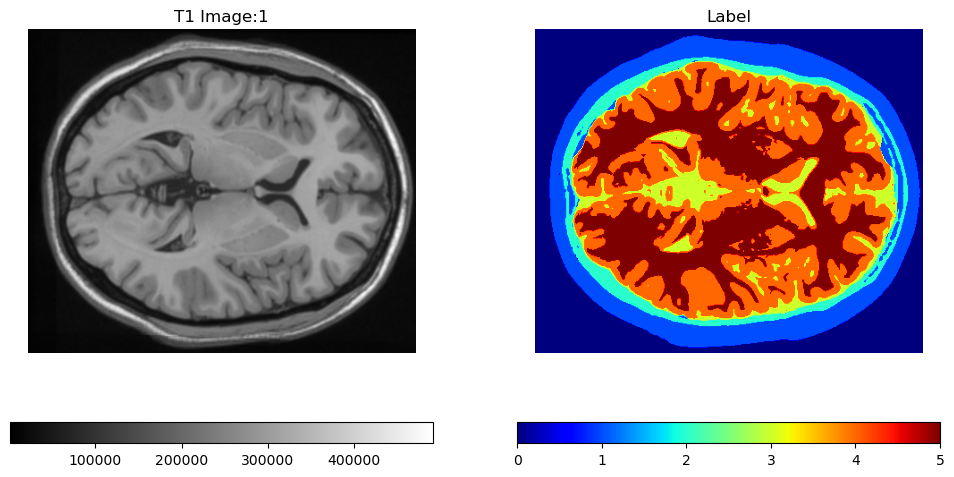

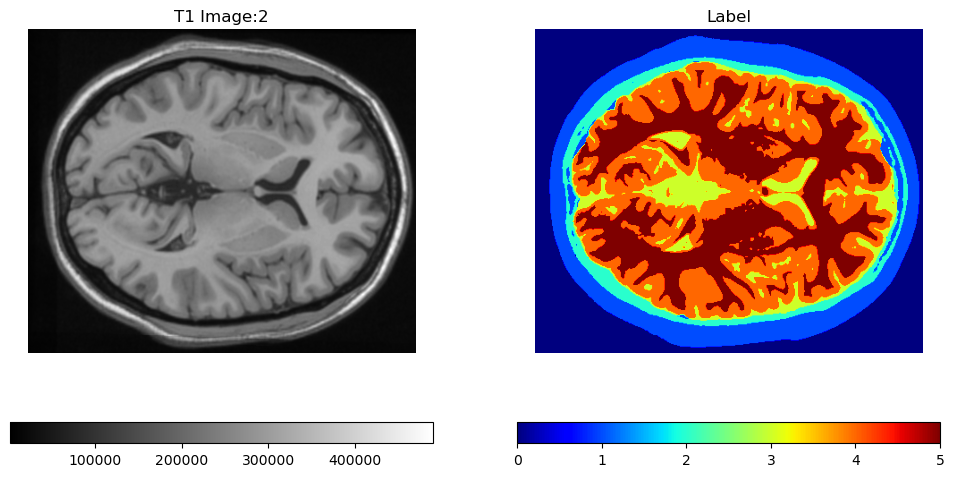

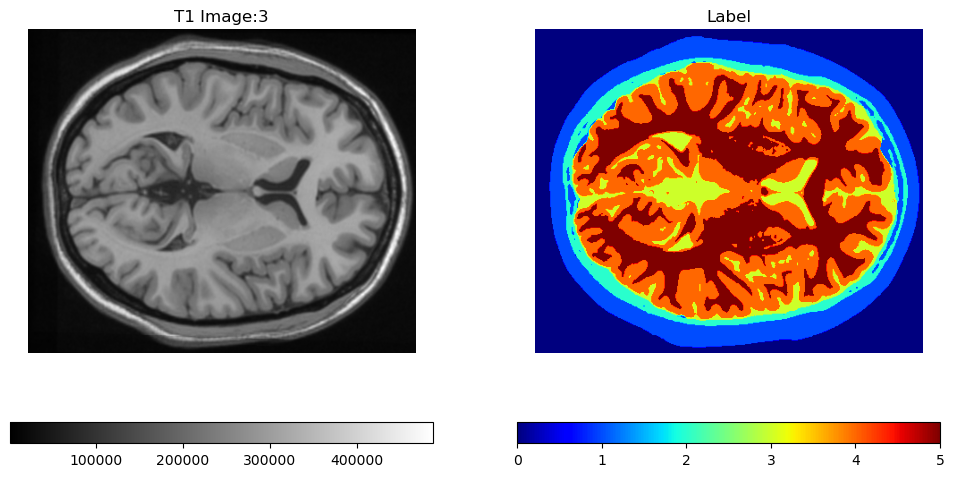

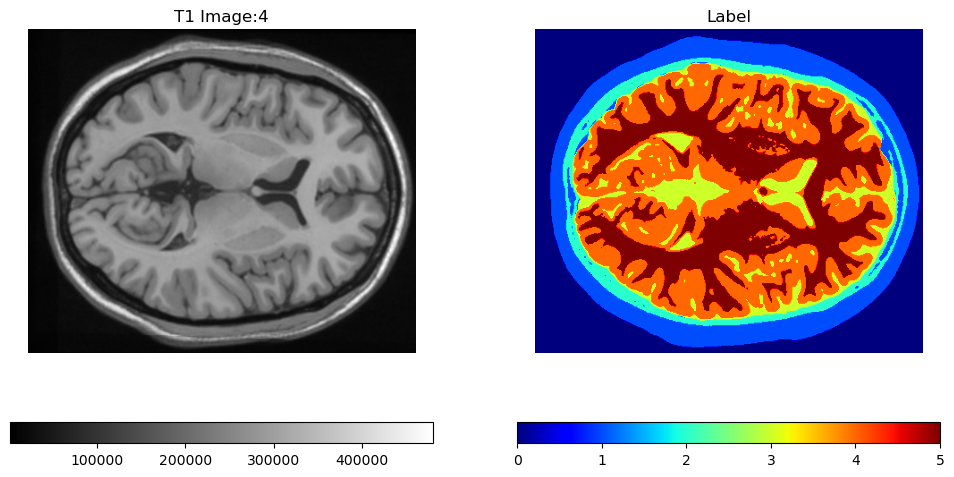

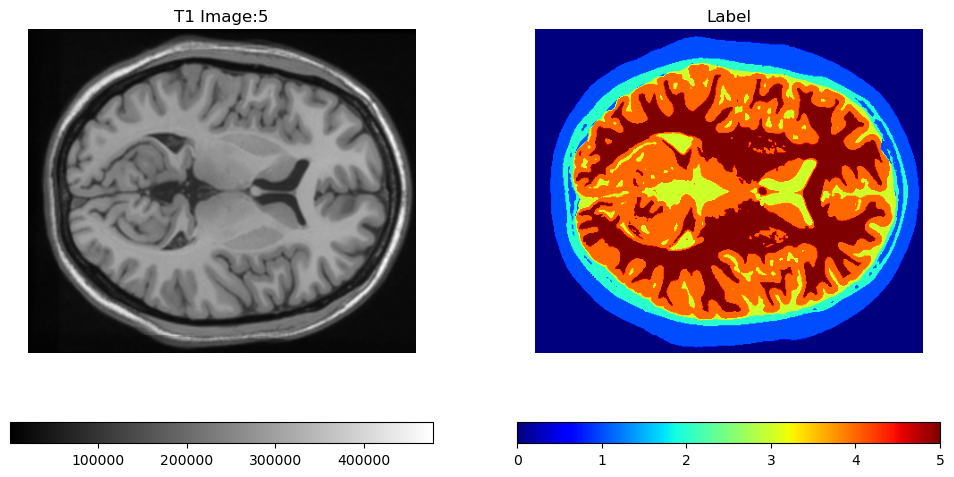

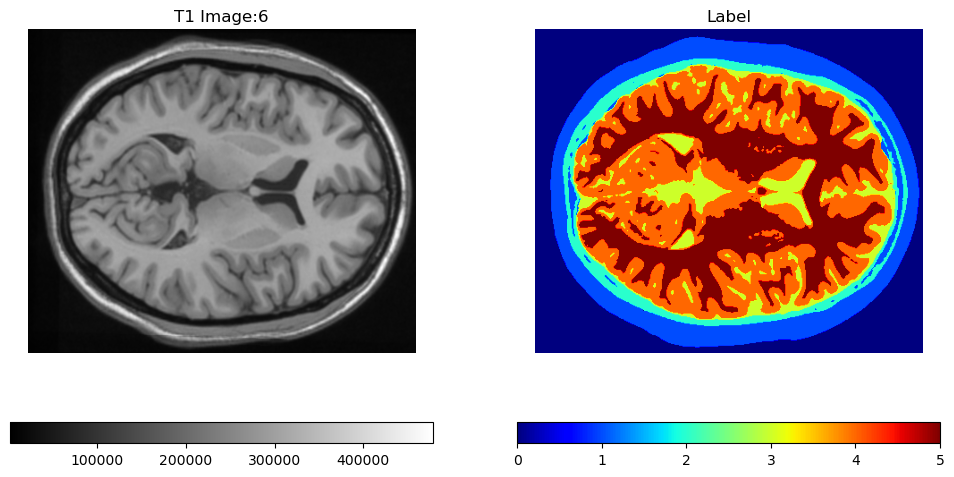

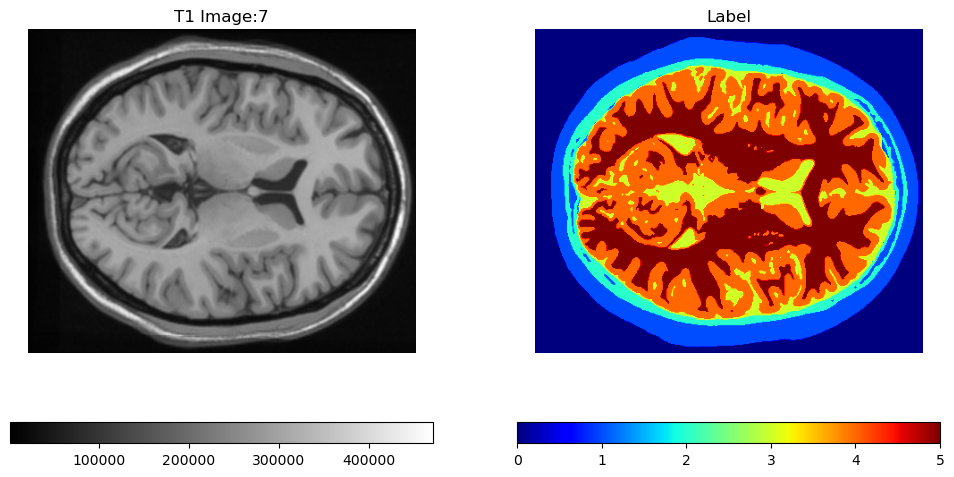

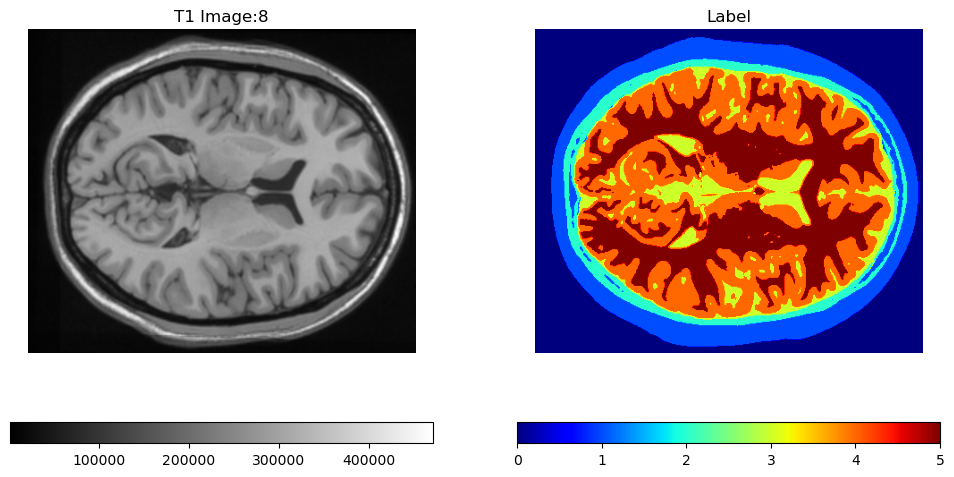

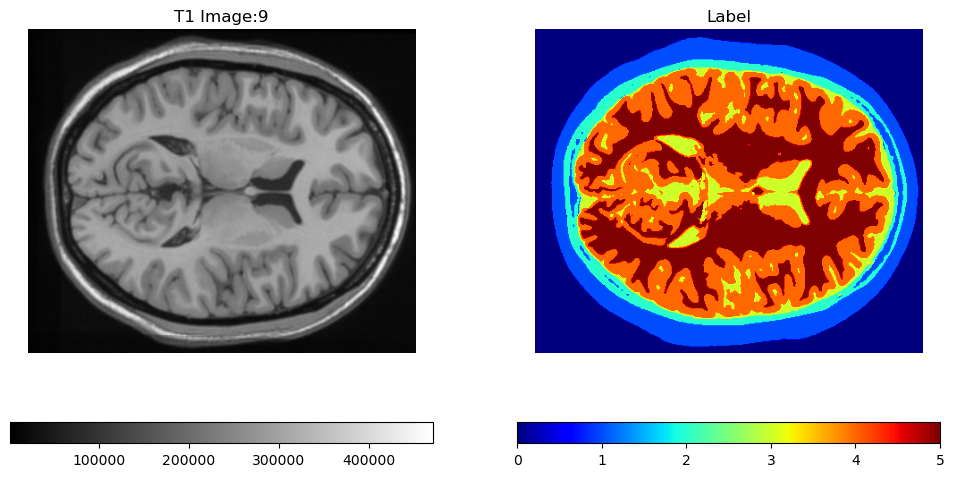

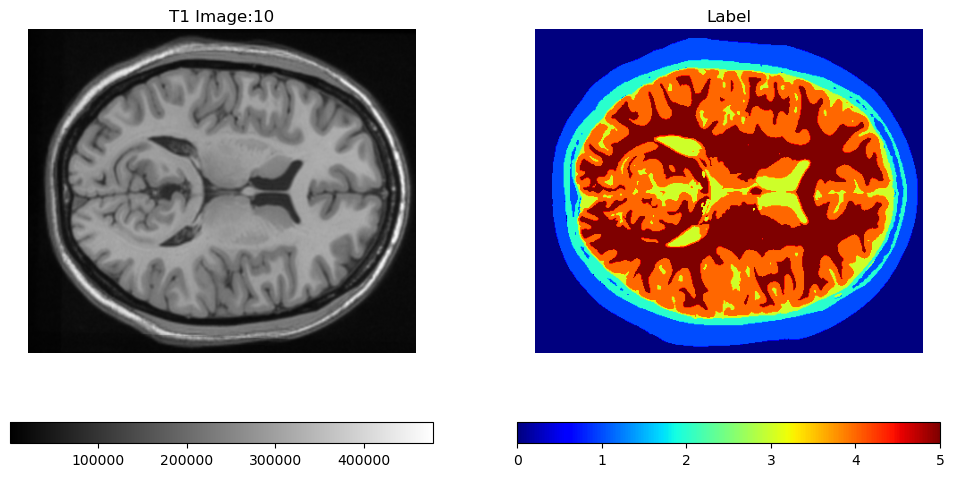

In [30]:

for slice_index in range(T1.shape[2]):
    # 绘制T1图像和对应的label
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    t1_image = axes[0].imshow(T1[:, :, slice_index], cmap='gray')
    axes[0].set_title('T1 Image:' + str(slice_index + 1))
    fig.colorbar(t1_image, ax=axes[0], orientation='horizontal')
    label_image = axes[1].imshow(labels[:, :, slice_index], cmap='jet')
    axes[1].set_title('Label')
    fig.colorbar(label_image, ax=axes[1], orientation='horizontal')
    # 隐藏坐标轴
    for ax in axes:
        ax.axis('off')

plt.show()

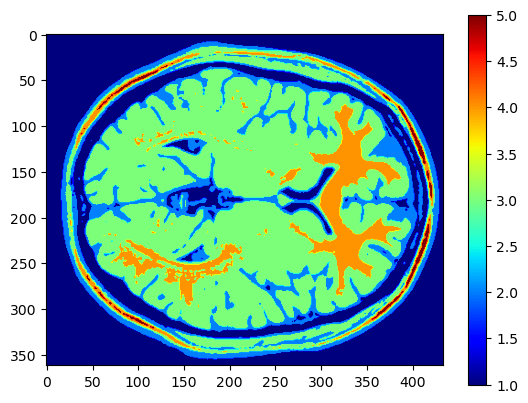

(362, 434)
int16


In [39]:
image = image_slice.astype(np.float32)
round_image = np.floor(image/100000 + 1).astype(image.dtype)
# 显示图像
fig, ax = plt.subplots()  # 创建一个带有子图的图形
im = ax.imshow(round_image, cmap='jet')

# 添加颜色条
plt.colorbar(im, ax=ax)  # 添加颜色条，指定要添加颜色条的轴

plt.show()


label = labels[:,:,0]
print(label.shape)
print(label.dtype)